**M. Teguh Wicaksono**

**2110031802042**

**Tugas Matkul: Data Science**

# Prediksi Customer `Churn` Telekomunikasi




# Pendahuluan

Telekomunikasi sudah menjadi bagian pokok bagi kehidupan baik untuk komunikasi, memperoleh informasi, bekerja, bahkan untuk sarana hiburan. Hal demikian membuat perusahaan telekomunikasi bersaing ketat untuk mendapatkan pelanggan. Pelanggan sangat penting bagi perusahaan karena pelangganlah yang menggunakan jasa atau produk yang dihasilkan oleh perusahaan sehingga tanpa adanya pelanggan, maka perusahaan tidak akan mendapatkan keuntungan.

*Customer Churn* didefinisikan sebagai kecenderungan pelanggan untuk berhenti menggunakan layanan atau jasa dengan sebuah perusahaan. Hal ini telah menjadi isu penting yang merupakan salah satu tantangan utama oleh banyak perusahaan di era global ini dan harus dihadapi. 

Karena untuk memperoleh pelanggan baru perusahaan harus mengadakan kampanye dan biaya yang dibutuhkan bisa dibilang cukup besar, maka project ini dilakukan untuk dapat mengidentifikasi apakah pelanggan baru tersebut akan `churn` atau tidak. Kemudian dalam melakukan kampanye, perusahaan mungkin bisa menawarkan solusi baru untuk meminimalkan tingkat `churn` pelanggannya.


**Layanan Interconnect**

Interconnect terutama menyediakan dua jenis layanan:

1. Landline network: Telepon dapat dihubungkan ke beberapa saluran secara bersamaan.
2. Internet: Jaringan dapat disetel melalui saluran telepon (DSL, digital subscriber line) atau melalui kabel serat optik.

Beberapa layanan lain yang disediakan perusahaan termasuk:

1. Internet security: perangkat lunak antivirus (DeviceProtection) dan pemblokir situs web berbahaya (OnlineSecurity)
2. Layanan dukungan teknis khusus (TechSupport)
3. Penyimpanan file awan dan cadangan data (OnlineBackup)
4. Streaming TV (StreamingTV) dan direktori film (StreamingMovies)

Klien dapat memilih pembayaran bulanan atau menandatangani kontrak 1 atau 2 tahun. Mereka dapat menggunakan berbagai metode pembayaran dan menerima faktur elektronik setelah transaksi.

**Deskripsi Dataset**

Data terdiri dari file yang diperoleh dari berbagai sumber:

- `contract.csv` — informasi kontrak
- `personal.csv` — data pribadi klien
- `internet.csv` — informasi tentang layanan internet
- `phone.csv` — informasi tentang layanan telepon

Di setiap file, kolom customerID berisi kode unik yang ditetapkan untuk setiap klien.

Setelah dataset digabungkan, maka informasi yang diberikat oleh dataset adalah sebagai berikut:

| Attribute | Type Data | Description |
| ---- | ---- | ---- |
customer_id        | object  | Nomor ID pelanggan |
type               | object  | Jangka waktu kontrak pelanggan (Month-to-month, One Year, Two Year) |
paperless_billing  | object  | Apakah pelanggan memiliki tagihan elektronik atau tidak |
payment_method     | object  | Metode pembayaran pelanggan (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)) |
monthly_charges    | float64 | Jumlah yang dibebankan kepada pelanggan setiap bulan |
total_charges      | float64 | Jumlah total beban pembayaran yang telah dibayar pelanggan | 
gender             | object  | Jenis kelamin nasabah (Female/Male) |
senior_citizen     | int64   | Informasi tentang apakah pelanggan sudah berusia lanjut atau tidak |
partner            | object  | Informasi tentang apakah pelanggan memiliki pasangan atau tidak |
dependents         | object  | Informasi tentang apakah pelanggan mempunyai tanggungan atau tidak |
internet_service   | object  | Informasi tentang apakah pelanggan menggunakan layanan internet |
online_security    | object  | Informasi tentang apakah pelanggan menggunakan layanan keamanan online dari penyedia layanan |
online_backup      | object  | Informasi tentang apakah pelanggan menggunakan layanan online backup dari penyedia layanan |
device_protection  | object  | Informasi tentang apakah pelanggan menggunakan layanan device protection dari penyedia layanan |
tech_support       | object  | Informasi tentang apakah pelanggan memiliki layanan dukungan teknis (tech support) |
streaming_tv       | object  | Informasi tentang apakah pelanggan menggunakan layanan streaming tv |
streaming_movies   | object  | Informasi tentang apakah pelanggan menggunakan layanan streaming movie |
multiple_lines     | object  | Informasi tentang apakah pelanggan memiliki satu atau lebih dari satu saluran telepon dari penyedia layanan |
churn              | int64   | Merujuk pada informasi apakah pelanggan berhenti menggunakan layanan atau tidak (Target) |

## Project Goals

Tujuan dari proyek ini adalah:

1. Membangun model machine learning untuk meramalkan churn / berhenti berhenti berlangganan klien Interconnect telekomunikasi.
2. Menerapkan analisis data eksploratif (EDA) untuk menemukan masalah yang sering menyebabkan `churn` dan bisa memberikan sebuah solusi baru untuk meminimalisir tingkat `churn` pelanggannya.
3. Menguji hipotesis apakah terdapat perbedaan jumlah layanan yang digunakan antara pelanggan yang `churn` dan `tidak`.
3. Menganalisis kecepatan dan kualitas prediksi, waktu yang dibutuhkan untuk pelatihan, dll.

# Import Library

In [1]:
# data wrangling dan visualisasi
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from functools import reduce
import re
from scipy import stats as st
from scipy.stats import uniform, randint
import time
# modeling 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, OrdinalEncoder
from sklearn.model_selection import KFold, cross_val_score, train_test_split, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, make_scorer
import optuna
# resample technique
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
# ignore warning
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")
warnings.filterwarnings("ignore", category=FutureWarning)

# Memuat dan Pemahaman Data

In [2]:
# memuat seluruh dataset
df_contract = pd.read_csv('datasets/contract.csv')
df_person = pd.read_csv('datasets/personal.csv')
df_internet = pd.read_csv('datasets/internet.csv')
df_phone = pd.read_csv('datasets/phone.csv')

**Fungsi - fungsi yang akan digunakan pada tahap ini**


In [3]:
def missing_report(data):
    report = data.isna().sum().to_frame(name='count')
    report['percent_total'] = (report['count'] / len(data) * 100).round(2).astype('str')+'%'
    return report

## Dataset `contract.csv`

In [4]:
# ukuran dataset
df_contract.shape

(7043, 8)

In [5]:
# menampilkan informasi umum
df_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


Dataset ini memiliki beberapa kolom tipe data yang perlu diubah kedalam bentuk yang seharusnya dan mengubah nama kolom menjadi huruf kecil dan menggunakan pemisah supaya nama kolom lebih terlihat rapih.

In [6]:
# menampilkan 5 data pertama
df_contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


Kita memiliki kolom `customerID` sebagai penanda untuk setiap pelanggan, kita bisa menggunakan kolom ini untuk memeriksa apakah terdapat data yang duplikat atau tidak.

In [7]:
# memeriksa duplikat
df_contract.duplicated(subset='customerID').sum()

0

In [8]:
# menghitung nilai yang hilang
missing_report(df_contract)

,count,percent_total
customerID,0,0.0%
BeginDate,0,0.0%
EndDate,0,0.0%
Type,0,0.0%
PaperlessBilling,0,0.0%
PaymentMethod,0,0.0%
MonthlyCharges,0,0.0%
TotalCharges,0,0.0%


## Dataset `personal.csv`

In [9]:
# ukuran dataset
df_person.shape

(7043, 5)

In [10]:
# menampilkan informasi umum
df_person.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [11]:
# menampilkan 5 data pertama
df_person.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [12]:
# memeriksa duplikat
df_person.duplicated(subset='customerID').sum()

0

In [13]:
# menghitung nilai yang hilang
missing_report(df_person)

,count,percent_total
customerID,0,0.0%
gender,0,0.0%
SeniorCitizen,0,0.0%
Partner,0,0.0%
Dependents,0,0.0%


## Dataset `internet.csv`

In [14]:
# ukuran dataset
df_internet.shape

(5517, 8)

In [15]:
# menampilkan informasi umum
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [16]:
# menampilkan 5 data pertama
df_internet.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [17]:
# memeriksa duplikat
df_internet.duplicated(subset='customerID').sum()

0

In [18]:
# menghitung nilai yang hilang
missing_report(df_internet)

,count,percent_total
customerID,0,0.0%
InternetService,0,0.0%
OnlineSecurity,0,0.0%
OnlineBackup,0,0.0%
DeviceProtection,0,0.0%
TechSupport,0,0.0%
StreamingTV,0,0.0%
StreamingMovies,0,0.0%


## Dataset `phone.csv`

In [19]:
# ukuran dataset
df_phone.shape

(6361, 2)

In [20]:
# menampilkan informasi umum
df_phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [21]:
# menampilkan 5 data pertama
df_phone.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [22]:
# memeriksa duplikat
df_phone.duplicated(subset='customerID').sum()

0

In [23]:
# menghitung nilai yang hilang
missing_report(df_phone)

,count,percent_total
customerID,0,0.0%
MultipleLines,0,0.0%


**Kesimpulan**

Seluruh dataset yang dimiliki tidak ditemukan *missing value* atau nilai yang hilang dan dupliat. Namun ada kolom yang semestinya kita ubah ke dalam format datetime. Kita akan menggabungkan seluruh dataset tersebut hingga menjadi 1 dataset saja.

# Merge Dataset (Penggabungan Data)

In [24]:
# Menggabungkan semua dataset secara bertahap
dataframes = [df_contract, df_person, df_internet, df_phone]
final_df = reduce(lambda left, right: pd.merge(left, right, on='customerID', how='left'), dataframes)

In [25]:
# informasi umum dataset final
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   gender            7043 non-null   object 
 9   SeniorCitizen     7043 non-null   int64  
 10  Partner           7043 non-null   object 
 11  Dependents        7043 non-null   object 
 12  InternetService   5517 non-null   object 
 13  OnlineSecurity    5517 non-null   object 
 14  OnlineBackup      5517 non-null   object 
 15  DeviceProtection  5517 non-null   object 
 16  TechSupport       5517 non-null   object 


In [26]:
# menampilkan 5 baris pertama dataset final
final_df.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No


In [27]:
# statistika deskriptif dataset
display(final_df.describe().transpose(),
       final_df.describe(include='object').transpose())

,count,mean,std,min,25%,50%,75%,max
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00


,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
BeginDate,7043,77,2014-02-01,366
EndDate,7043,5,No,5174
Type,7043,3,Month-to-month,3875
PaperlessBilling,7043,2,Yes,4171
PaymentMethod,7043,4,Electronic check,2365
TotalCharges,7043,6531,,11
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933


In [28]:
# menghitung missing value dari final dataset
missing_report(final_df)

,count,percent_total
customerID,0,0.0%
BeginDate,0,0.0%
EndDate,0,0.0%
Type,0,0.0%
PaperlessBilling,0,0.0%
PaymentMethod,0,0.0%
MonthlyCharges,0,0.0%
TotalCharges,0,0.0%
gender,0,0.0%
SeniorCitizen,0,0.0%


## Kesimpulan Awal

1. Setelah penggabungan(merge) data. Kita mendapati *missing value* pada beberapa kolom dengan proporsi yang cukup besar. Berikut adalah data dan komposisinya:
    - `InternetService` - 21.67%
    - `OnlineSecurity` - 21.67%
    - `OnlineBackup` - 21.67%
    - `DeviceProtection` - 21.67%
    - `TechSupport` - 21.67%
    - `StreamingTV` - 21.67%
    - `StreamingMovies` - 21.67%
    - `MultipleLines` - 9.68%
2. Dataset yang dimiliki belum mempunyai label atau kelas target. Untuk itu kita akan mendapatkan label target berdasarkan kolom `EndDate`, karena kolom tersebut berisi tanggal berhenti ketika pelanggan berhenti menggunakan layanan, dan terdapat nilai `No` untuk pelanggan yang masih menggunakan layanan.
3. Kemudian kita akan menghapus kolom `BeginDate` karena pada tahap EDA (Exploratory Data Analysis) kolom tersebut tidak digunakan dan pada training model kolom tersebut juga tidak akan digunakan.
4. Dan yang terakhir adalah kita perlu mengubah tipe data pada kolom `TotalCharges` ke type `float`.

# Data Pre-Processing

Sebelum masuk ke tahap selanjutnya, kita akan mengubah format dalam penamaan kolom pada dataset terlebih dahulu.

In [29]:
#
new_columns =[]

for col in final_df.columns:
    if col == 'customerID' or col == 'StreamingTV':
        new_columns.append(re.sub(r'(?<!^)(?=[I, T])','_',col))
    else:
        new_columns.append(re.sub(r'(?<!^)(?=[A-Z])','_',col))
        
# mengubah nama kolom
final_df.columns = [element.lower() for element in new_columns]

# menampilkan hasil
final_df.columns

Index(['customer_id', 'begin_date', 'end_date', 'type', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges', 'gender',
       'senior_citizen', 'partner', 'dependents', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'multiple_lines'],
      dtype='object')

## Mengubah Tipe Data

Kolom `total_charges` memiliki tipe data `object` sedangkan nilai pada kolom ini merupakan variabel kontinu, untuk itu kita akan mengubahnya ke tipe data `float`. 

In [30]:
# memeriksa nilai pada kolom total_charges
final_df.total_charges.value_counts().head()

total_charges
         11
20.2     11
19.75     9
20.05     8
19.9      8
Name: count, dtype: int64

Terdapat nilai kosong pada kolom ini, ketika kita mengganti tipe datanya mungkin akan menimbulkan nilai yang hilang pada kolom tersebut sebanyak `11` observasi. Kita akan memilih untuk menghapus data tersebut karena persentasenya bisa dibilang sangat kecil. 

In [31]:
# mengubah tipe data `total_charges` ke numeric
final_df['total_charges'] = pd.to_numeric(final_df['total_charges'], errors='coerce')

In [32]:
# menghapus nilai yang hilang sebanyak 11 observasi
final_df.dropna(subset='total_charges', inplace=True)

## Menambahkan Label (Kelas) Target

In [33]:
# menambahkan label target
final_df['churn'] = final_df['end_date'].apply(lambda x: 1 if x != 'No' else 0)

**Crosscheck untuk hasil**

In [34]:
# sample end_date == No dan churn == 0
final_df.query('churn == 0')[['end_date','churn']].sample(2)

,end_date,churn
4625,No,0
2304,No,0


In [35]:
# sample end_date == date dan churn == 1
final_df.query('churn == 1')[['end_date','churn']].sample(2)

,end_date,churn
3743,2020-01-01 00:00:00,1
4169,2020-01-01 00:00:00,1


**Menghapus beberapa kolom yang tidak digunakan pada tahap EDA**

Kemudian lanjut ke tahap penghapusan kolom, kolom yang tidak digunakan adalah `begin_date` dan `end_date`, kita menghapus `end_date` karena telah mendapatkan label atau target yang dibutuhkan.

In [36]:
# penghapusan kolom
final_df = final_df.drop(['begin_date','end_date'], axis=1)

## Mengatasi *Missing Value*

In [37]:
# tabel missing value report
missing_df = missing_report(final_df)
missing_df = missing_df.query('count > 0')
missing_df

,count,percent_total
internet_service,1520,21.62%
online_security,1520,21.62%
online_backup,1520,21.62%
device_protection,1520,21.62%
tech_support,1520,21.62%
streaming_tv,1520,21.62%
streaming_movies,1520,21.62%
multiple_lines,680,9.67%


### Kolom `internet_service`

Hal yang pertama dilakukan adalah memeriksa nilai pada kolom `internet_service`.

In [38]:
# memeriksa value pada kolom internet_service
final_df['internet_service'].value_counts(dropna=False)

internet_service
Fiber optic    3096
DSL            2416
NaN            1520
Name: count, dtype: int64

1. Kolom `internet_service` memiliki hanya tiga nilai unik: 'DSL', 'Fiber optic', dan NaN.
2. Nilai NaN dalam kolom `internet_service` muncul saat proses penggabungan data.
3. Dengan kata lain, nilai NaN menunjukkan bahwa pelanggan tidak menggunakan layanan internet.

Karena kita berasumsi nilai yang hilang merupakan data pelanggan yang tidak menggunakan layanan internet, untuk itu kita mengisi nilai yang hilang dengan nilai `No internet service`.

In [39]:
# mengisi nilai yang hilang setelah mengambil keputusan
final_df['internet_service'] = final_df['internet_service'].fillna('No internet Service')

In [40]:
# crosscheck hasil akhir
final_df.internet_service.value_counts(dropna=False)

internet_service
Fiber optic            3096
DSL                    2416
No internet Service    1520
Name: count, dtype: int64

**Memeriksa nilai yang hilang pada kolom yang tersisa**


In [41]:
# memfilter kolom yang terdapat missing value
columns_to_check = ['online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'multiple_lines']

os_missing = final_df[final_df[columns_to_check].isnull().any(axis=1)]
len(os_missing)

2200

In [42]:
# mengatur ukuran tabel
pd.set_option('display.max_colwidth', 1)

# list untuk menampung item
list_item = []

for col in columns_to_check:
    list_item.append([col, os_missing[col].nunique(), os_missing[col].unique(), len(os_missing[col])])
    
# membuat tabel unique
unique_table_info = pd.DataFrame(list_item, columns=['columns', 'number_unique', 'unique_value', 'length'])
# menampilkan tabel unique
unique_table_info

,columns,number_unique,unique_value,length
0,online_security,2,"[No, Yes, nan]",2200
1,online_backup,2,"[Yes, No, nan]",2200
2,device_protection,2,"[No, Yes, nan]",2200
3,tech_support,2,"[No, Yes, nan]",2200
4,streaming_tv,2,"[No, nan, Yes]",2200
5,streaming_movies,2,"[No, nan, Yes]",2200
6,multiple_lines,2,"[nan, No, Yes]",2200


**Kesimpulan**

Setelah diperiksa ternyata ke-7 kolom tersebut merupakan *data nominal* dimana nilainya hanya berisi `Yes` dan `No`. Kemudian data yang hilang ini muncul pada saat kita menggabungkan keseluruhan dataset. Kita bisa berasumsi bahwa `2208` data dengan nilai yang hilang tidak menggunakan ke-7 layanan tersebut. Untuk itu kita dapat mengisi nilai yang hilang dengan `No`.

### Kolom `online_security`, `online_backup`, `device_protection`, `tech_support`, `streaming_tv`, `streaming_movies`, `multiple_lines`.

In [43]:
# mengisi nilai yang hilang ke-7 kolom 
final_df[columns_to_check] = final_df[columns_to_check].fillna('No')


In [44]:
# memeriksa hasil akhir apakah masih terdapat nilai yang hilang ?
missing_report(final_df)

,count,percent_total
customer_id,0,0.0%
type,0,0.0%
paperless_billing,0,0.0%
payment_method,0,0.0%
monthly_charges,0,0.0%
total_charges,0,0.0%
gender,0,0.0%
senior_citizen,0,0.0%
partner,0,0.0%
dependents,0,0.0%


# Exploratory Data Analysis (EDA)

## Distribusi kolom numerical

Pada tahap awal yang dilakukan adalah mengecek distribusi dari kolom `monthly_charges` dan `total_charges` apakah data tersebut terdistribusi secara normal atau tidak. Kita akan menguji hipotesis menggunakan *normaltest*.

<Figure size 2000x800 with 0 Axes>

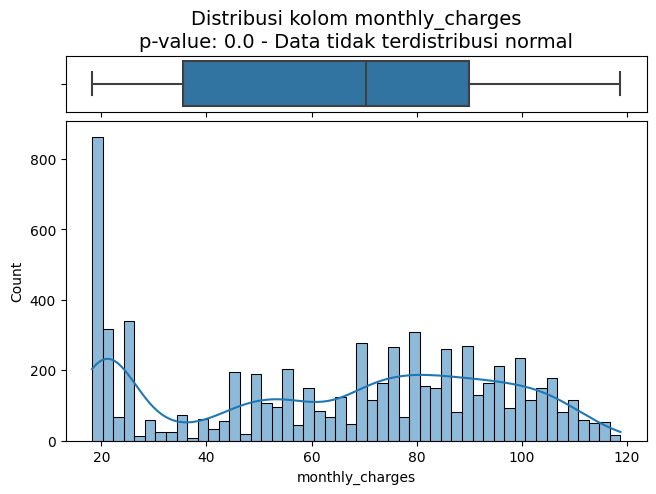

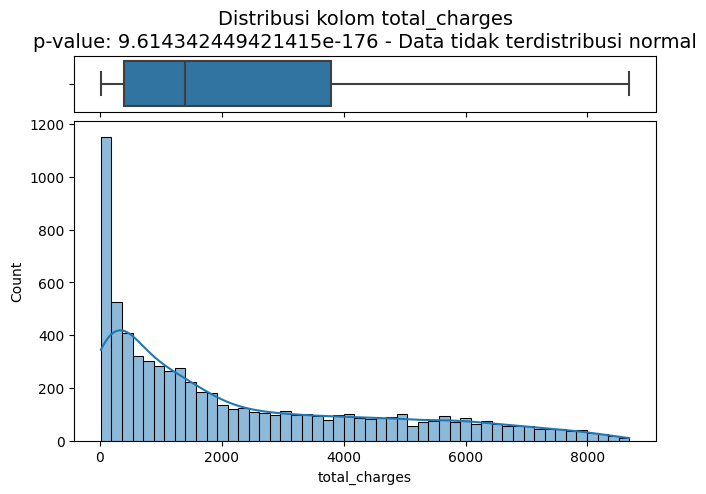

In [45]:
# menguji hipotesis mengguunakan normaltest untuk melihat distribusi dari kolom tersebut
plt.figure(figsize=(20,8))
for c in ['monthly_charges','total_charges']:
    fix, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(7.5, 5),
                                   gridspec_kw={'height_ratios': (.15, .85),
                                               'hspace': .05}
                                  )
    
    stat, pvalue = st.normaltest(final_df[c])
    
    alpha = .05 # alpha 5%
    if pvalue < alpha:
        distribution = f'p-value: {pvalue} - Data tidak terdistribusi normal'
    else:
        distribution = f'p-value: {pvalue} - Data terdistribusi normal'
        
    ax1.set_title(f'Distribusi kolom {c}\n{distribution}', size=14)
    sns.boxplot(x=final_df[c], ax=ax1)
    ax1.set(xlabel='')
    #
    sns.histplot(data=final_df[c], stat='count', kde=True, ax=ax2, bins=50)
    plt.show()

**Kesimpulan**

Tidak satupun dari kedua kolom numerik diatas terdistribusi secara normal dan bisa dipastikan bahwa kolom numerical yang dimiliki dataset ini tidak mempunyai outlier sedikitpun.

## Distribusi kolom categorical

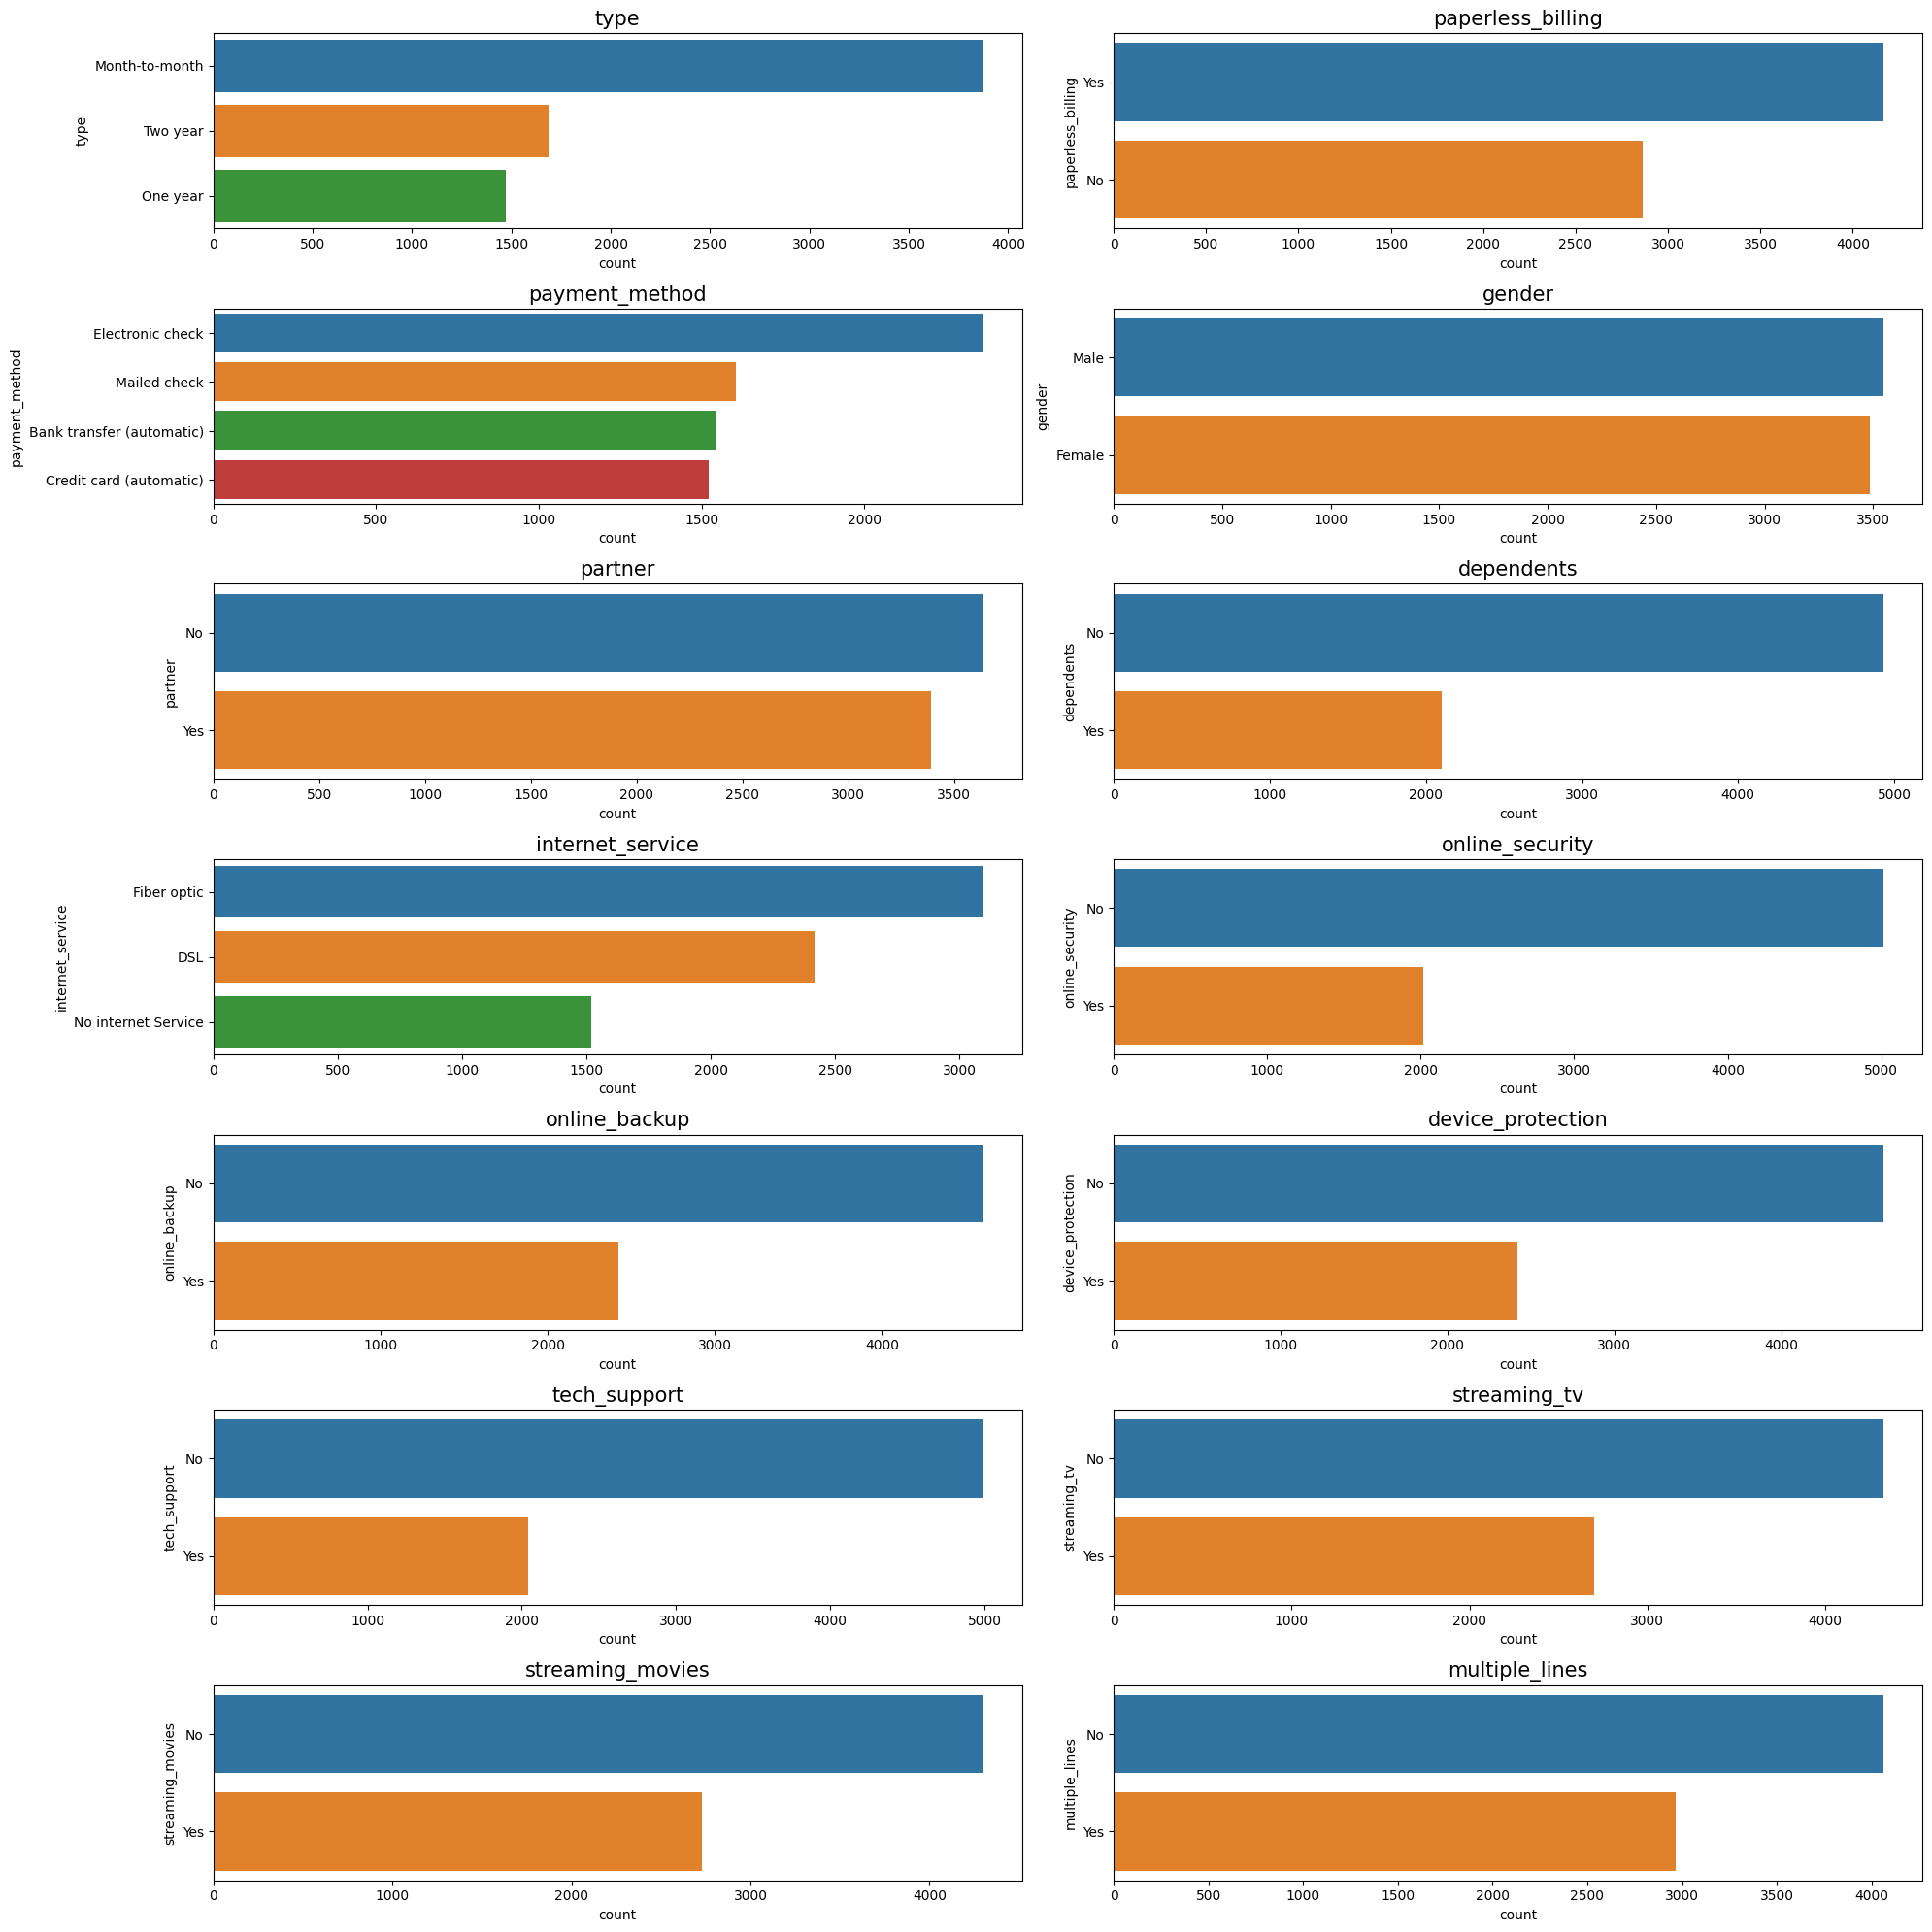

In [46]:
# nama-nama kolom kategorik
cat_cols = final_df.describe(include='object').columns.drop('customer_id')
#
fig, axes = plt.subplots(7, 2, figsize=(20, 20)) 
for i, j in zip(cat_cols, axes.flatten()):
    ax = sns.countplot(data=final_df, y= i, ax= j, order=final_df[i].value_counts().index)
    ax.set_title(f'{i}',size = 15) 
plt.tight_layout()
plt.show()

**Insight**

Berdasarkan distribusi dari kolom categorical, distribusi pelanggan yang tidak menggunakan layanan yang disediakan oleh perusahaan terbilang cukup banyak dari pada yang penggunakan, hal ini bisa dilihat pada distribusi kolom berikut:
- online_backup
- tech_support
- streaming_movies
- online_security
- device_protection
- streaming_tv

Kemudian pelanggan umunya lebih memilih kontrak/langganan terhadap perusahaan dengan kategori `bulan ke bulan` atau `Month to month` dibandingkan kontrak yang lainnya. Lalu untuk metode pembayaran pelanggan umumnya menggunakan `electronic check`. 

## Analisis Terhadap Pelanggan Churn atau Tidak

In [47]:
# Filter data untuk Churn dan Not Churn
churn_data = final_df.query('churn == 1')
not_churn_data = final_df.query('churn == 0')

### Analisis Berdasarkan Tagihan Bulanan

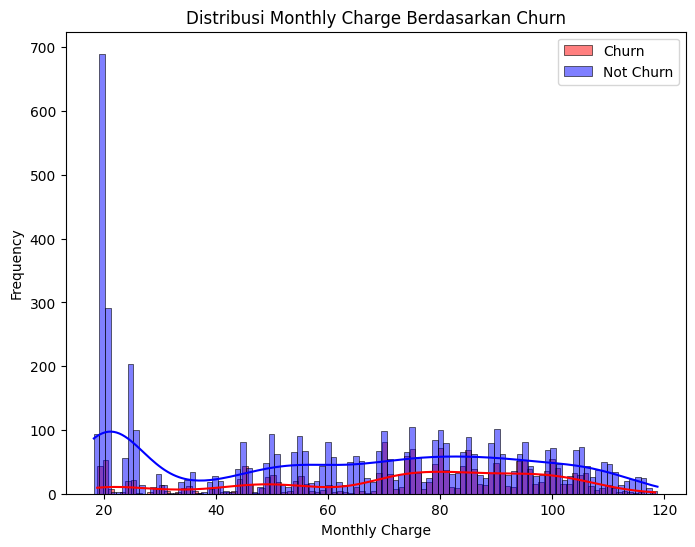

In [48]:
# Visualisasi untuk distribusi monthly charges
plt.figure(figsize=(8, 6))
sns.histplot(churn_data['monthly_charges'], color='red', label='Churn', kde=True, bins=100)
sns.histplot(not_churn_data['monthly_charges'], color='blue', label='Not Churn', kde=True, bins=100)

plt.title('Distribusi Monthly Charge Berdasarkan Churn')
plt.xlabel('Monthly Charge')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Berdasarkan distribusi diatas, kita dapat menyimpulkan hampir tidak ada perbedaan dalam distribusi tagihan bulanan antara pelanggan yang churn dan tidak semuanya dimulai dari 18dollar hingga 120dollar dan semuanya memiliki sebaran data yang hampir sama.

**ex perbedaan:** distribusi pelanggan yang churn dimulai dari tagihan sebesar 80dollar hingga 120dollar sedangkan pelanggan yang tidak dimulai dari 18dollar hingga 120dollar.

### Analisis Berdasarkan Type Kontrak

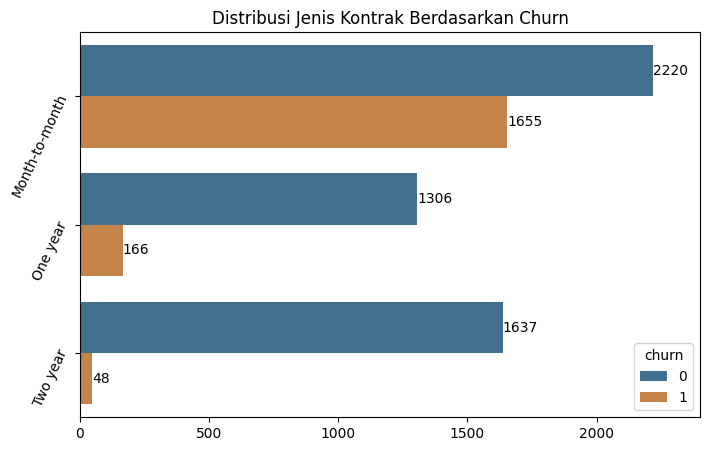

In [49]:
plt.figure(figsize=(8,5))
ax = sns.countplot(data=final_df, y='type', hue='churn', saturation=.5)

for container in ax.containers:
    ax.bar_label(container)
    
plt.xlim(0, 2400)
plt.xlabel('')
plt.ylabel('')
plt.yticks(rotation=65)
plt.title('Distribusi Jenis Kontrak Berdasarkan Churn')
plt.savefig('img/contract.png')
plt.show()


In [50]:
final_df.groupby(['type','churn'])['type'].value_counts().reset_index()

,type,churn,count
0,Month-to-month,0,2220
1,Month-to-month,1,1655
2,One year,0,1306
3,One year,1,166
4,Two year,0,1637
5,Two year,1,48


**Insight**

Dari sini kita dapat kesimpulan bahwa pelanggan yang `churn` rata-rata hanya mengambil jenis langganan / kontrak `month-to-month`. Mungkin akan lebih baik jika perusahaan mencoba melakukan promo dan kampanye untuk jenis kontrak 1 tahun dan 2 tahun sehingga akan menarik lebih banyak pelanggan yang menggunakan jenis kontrak tersebut dan mungkin dapat meminimalisir tingkat `churn` berdasarkan jenis kontrak. 

### Analisis Berdasarkan Kategori Usia Nasabah

Pada kolom `senior_citizen` kita mengetahui bahwa apakah nasabah berusia lanjut atau tidak (`1` = `Ya` dan `0` = `Tidak`). Kita akan coba lihat distribusi dari kolom ini berdasarkan pelanggan yang churn dan tidak.

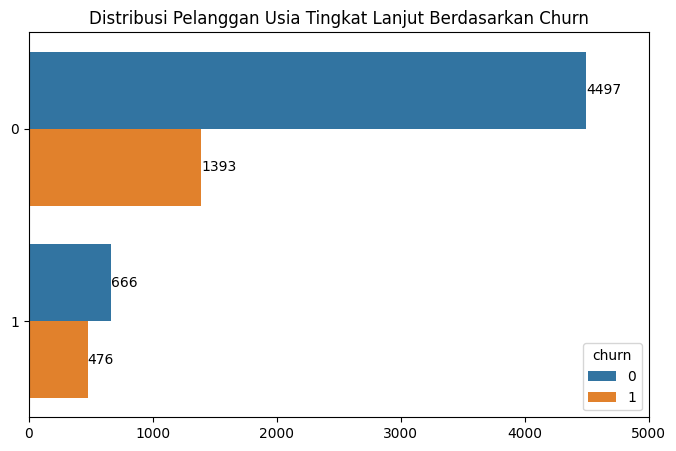

In [51]:
plt.figure(figsize=(8,5))
ax = sns.countplot(data=final_df, y='senior_citizen', hue='churn')

for container in ax.containers:
    ax.bar_label(container)
    
plt.xlim(0, 5000)
plt.xlabel('')
plt.ylabel('')
plt.title('Distribusi Pelanggan Usia Tingkat Lanjut Berdasarkan Churn')
plt.show()

Sepertinya pada kategori ini tidak terdapat pola yang khusus terhadap pelanggan yang churn.

### Analisis Berdasarkan Kategori Tanggungan Nasabah

Kemudian pada kolom `dependents` kita mengetahui bahwa kolom ini mempunyai informasi apakah pelanggan mempunyai tanggungan (`Yes`) atau tidak (`No`). Kita akan melihat apakah pelanggan yang `churn` mempunyai distribusi yang lebih banyak untuk kategori pelanggan yang mempunyai tanggungan (`Yes`).

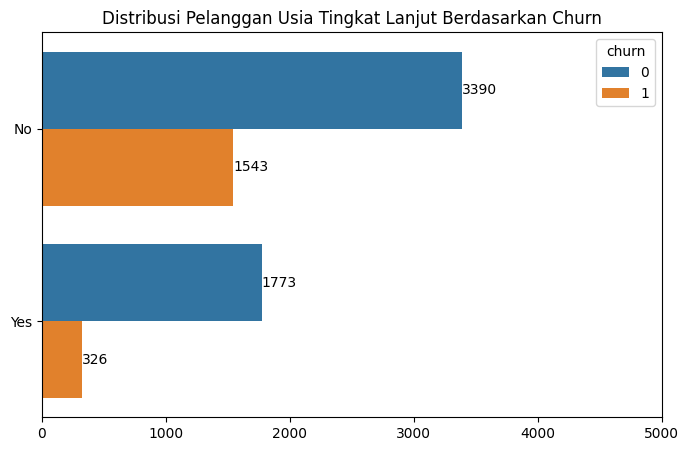

In [52]:
plt.figure(figsize=(8,5))
ax = sns.countplot(data=final_df, y='dependents', hue='churn')

for container in ax.containers:
    ax.bar_label(container)
    
plt.xlim(0, 5000)
plt.xlabel('')
plt.ylabel('')
plt.title('Distribusi Pelanggan Usia Tingkat Lanjut Berdasarkan Churn')
plt.show()

Berdasarkan tabel distribusi diatas kita tidak bisa menyimpulkan bahwa pelanggan yang `churn` adalah pelanggan yang mempunyai tanggungan (`Yes`). Dari data diatas dapat dilihat bahwa pelanggan yang `churn` memiliki distribusi lebih banyak untuk kategori pelanggan yang tidak mempunyai tanggungan (`No`).

## Menguji Hipotesis

Kita akan menguji hipotesis berikut ini:
- h0 = Tidak terdapat perbedaan jumlah layanan yang digunakan antara pelanggan yang churn dan tidak
- h1 = Terdapat perbedaan jumlah layanan yang digunakan antara pelanggan yang churn dan tidak

Sebelum menguji hipotesis, kita perlu menjumlahkan total layanan (service) yang digunakan oleh setiap pelanggan.

In [53]:
col_names = ['customer_id','online_backup','tech_support','streaming_movies','online_security'\
                ,'device_protection','streaming_tv']

In [54]:
new_df = final_df[col_names].replace({'Yes':1, 'No':0})

# menambahkan kolom baru dengan menghitung jumlah layanan yang digunakan
new_df['total_services'] = new_df.iloc[:, 1:7].sum(axis=1) 
# mendapatkan kolom churn
new_df = new_df.merge(final_df[['customer_id','churn']], on='customer_id', how='left') 
new_df.sample(5)

,customer_id,online_backup,tech_support,streaming_movies,online_security,device_protection,streaming_tv,total_services,churn
4358,4737-HOBAX,0,1,1,0,1,1,4,0
4898,8639-NHQEI,1,0,0,1,0,1,3,0
6880,7853-OETYL,0,0,0,1,0,0,1,0
5075,7136-IHZJA,1,1,1,1,0,0,4,0
2920,2931-XIQBR,0,1,1,0,1,1,4,0


In [55]:
# membagi data antara pelanggan yang churn dan tidak
churn = new_df.query('churn == 1')
not_churn = new_df.query('churn == 0')

In [56]:
# Melakukan uji Mann-Whitney U
statistic, p_value = st.mannwhitneyu(churn['total_services'], 
                                     not_churn['total_services'], 
                                     alternative='two-sided')

# Menampilkan hasil uji
print(f"Nilai U statistic: {statistic}")
print(f"P-Value: {p_value}")
print(30*'-')

# Menentukan tingkat signifikansi (contoh: alpha = 0.05)
alpha = 0.05

# Melakukan pengecekan apakah hasil uji signifikan atau tidak
if p_value < alpha:
    print("H0 ditolak -> h1 diterima")
else:
    print("H0 diterima")

Nilai U statistic: 4453265.5
P-Value: 4.388242456432056e-07
------------------------------
H0 ditolak -> h1 diterima


Berdasarkan hasil uji hipotesis kita dapat menolak h0. Artinya kita punya cukup bukti untuk mengatakan bahwa:
**Terdapat perbedaan jumlah layanan yang digunakan antara pelanggan yang churn dan tidak**

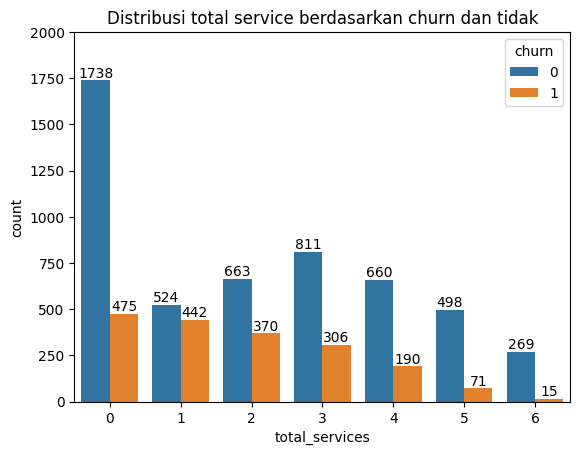

In [57]:
# distribusi total service berdasarkan kelompok churn dan tidak
ax = sns.countplot(data=new_df, x='total_services', hue='churn')

for container in ax.containers:
    ax.bar_label(container)
    
plt.ylim(0, 2000)
plt.title('Distribusi total service berdasarkan churn dan tidak')
plt.show()

In [58]:
# menambahkan kolom total service ke dataset penuh
final_df = final_df.merge(new_df[['customer_id','total_services']], on='customer_id', how='left') 
# menyimpan ke csv
final_df.to_csv('final_dataset.csv', index=False)
final_df.sample()

,customer_id,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines,churn,total_services
3930,5712-VBOXD,Month-to-month,Yes,Credit card (automatic),20.15,68.45,Female,0,No,No,No internet Service,No,No,No,No,No,No,No,0,0


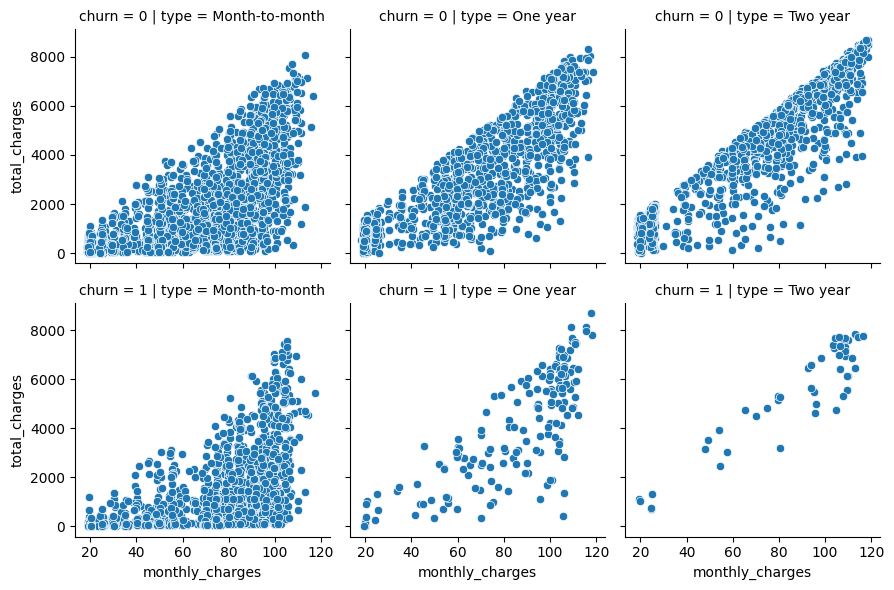

In [59]:
# Visualisasi Hubungan Antara Total Biaya dan Biaya Bulanan Berdasarkan Tipe dan Churn Pelanggan
i_service_facet = sns.FacetGrid(final_df, col='type', row='churn')

i_service_facet.map(sns.scatterplot, 'monthly_charges', 'total_charges')
plt.show()

## Kesimpulan Tahap EDA

Setelah melakukan tahapan *Exploratory Data Analysis (EDA)* kita menemukan pola dan telah menguji hipotesis, kemudian ada beberapa kesimpulan yang bisa diambil dan mungkin bisa membantu perusahaan dalam mengambil keputusan untuk meminimalisir tingkat `churn` pelanggannya. Diantaranya yaitu:

1. Pelanggan yang `churn` umumnya menggunakan jenis kontrak untuk langganan `month-to-month`.
2. Semakin banyak pelanggan menggunakan layanan yang disediakan perusahaan, maka semakin sedikit pula pelanggan yang memilih untuk `churn`.

Untuk itu akan lebih baik jika perusahaan mengambil langkah untuk kampanye dengan menarik pelanggannya menggunakan kontrak yang lebih dari sekedar `month-to-month` dan ajak pelanggan untuk menggunakan lebih banyak layanan (services) yang disediakan oleh perusahaan dengan memberikan promo atau sesuatu yang bisa membuat pelanggan tertarik. Jika hal ini dilakukan mungkin perusahaan bisa meminimalisir tingkat `churn` pelanggannya.

# Modeling

## Data Preparation

Sebelum masuk ke tahap transformasi data, kita akan melakukan pengecekan nilai untuk setiap kolom fitur kategorik. Hal ini dilakukan agar bisa menentukan encoding apa yang sesuai untuk dataset kita.

In [60]:
# list untuk menampung jumlah unique dan value unique
list_item = []

#
for col in final_df.describe(include='object').columns.drop('customer_id'):
    list_item.append([col, final_df[col].nunique(), final_df[col].unique()])


# membuat tabel unique
unique_table_info = pd.DataFrame(list_item, columns=['columns', 'number_unique', 'unique_value'])
# menampilkan tabel unique
unique_table_info

,columns,number_unique,unique_value
0,type,3,"[Month-to-month, One year, Two year]"
1,paperless_billing,2,"[Yes, No]"
2,payment_method,4,"[Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)]"
3,gender,2,"[Female, Male]"
4,partner,2,"[Yes, No]"
5,dependents,2,"[No, Yes]"
6,internet_service,3,"[DSL, Fiber optic, No internet Service]"
7,online_security,2,"[No, Yes]"
8,online_backup,2,"[Yes, No]"
9,device_protection,2,"[No, Yes]"


Untuk setiap variabel kategorik dari dataset ini merupakan data nominal, untuk itu kita akan melakukan transformasi data menggunakan *OneHotEncoder* atau *OHE* dan kita tidak akan menggunakan ke-6 kolom pada saat pengujian hipotesis karena kita hanya akan menggunakan kolom `total_services` sebagai perwakilan dari semua kolom tersebut.

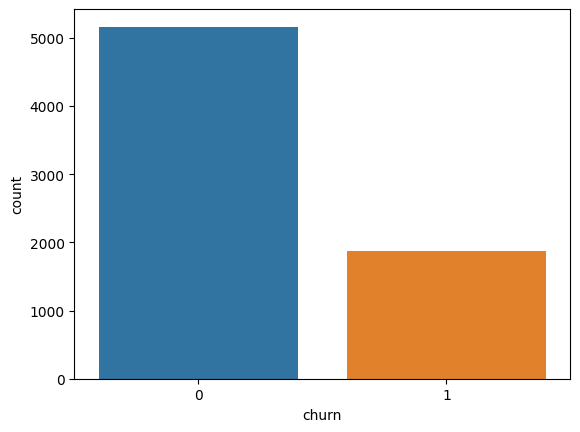

In [61]:
## memeriksa kelas label / target
sns.countplot(data=final_df, x='churn')

plt.show()

### Membagi Features dan Target

In [62]:
# features
features = final_df.drop(['customer_id','online_backup','tech_support','streaming_movies','online_security','device_protection','streaming_tv','churn'], axis=1)
# target
target = final_df.churn

In [63]:
# splitting data dengan komposisi 75:25
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size = .25, stratify=target, random_state=12345)

Kita menambahkan parameter `stratify` dengan valuenya adalah `target`, hal ini berguna karena tugas dalam project ini adalah klasifikasi dan dengan menggunakan parameter `stratify` maka proporsi data training dan data testing akan seimbang / sama.

## Training Model With Imbalance Class

In [64]:
numeric_cols = features.describe().columns.to_list()
categoric_cols = features.describe(include='object').columns.to_list()


# columns transformer
preprocessor = ColumnTransformer(transformers=[
    ('categoric', OneHotEncoder(), categoric_cols),
    ('numeric', MinMaxScaler(), numeric_cols)
])

### Default Parameter 

In [65]:
# inisialisasi model-model yang akan digunakna
rf = RandomForestClassifier(random_state=12345)
dt = DecisionTreeClassifier(random_state=12345)
knn = KNeighborsClassifier()
svc = SVC()
lgb = LGBMClassifier(verbose=0)

models = [rf, dt, knn, svc, lgb]

In [66]:
list_result = []
for model in models:
    start_time = time.time()
    model_pipe = Pipeline([
        ('prep', preprocessor),
        ('algo', model)
    ])
    # model name
    name = model_pipe['algo'].__class__.__name__
    # inisialisasi kfold
    kfold = KFold(n_splits=5, shuffle=True, random_state=12345)
    # score yang akan dihitung
    scores = ['accuracy', 'roc_auc', 'f1']
    # variabel untuk menyimpan skor
    model_scores = []
    # kfold cross validation
    for score_name in scores:
        score = cross_val_score(model_pipe, features_train, target_train, cv=kfold, scoring=score_name)
        model_scores.append(score.mean())  # Simpan nilai rata-rata skor dari setiap metric
    # waktu eksekusi model
    end_time = time.time()
    exec_time = end_time - start_time
    # 
    list_result.append([name, *model_scores, exec_time])

# membuat dataframe dari list_result
columns = ['model_name', 'accuracy_score', 'auc_roc_score', 'f1_score', 'executed_time(s)']
default_result = pd.DataFrame(list_result, columns=columns)
default_result

,model_name,accuracy_score,auc_roc_score,f1_score,executed_time(s)
0,RandomForestClassifier,0.781380,0.811284,0.534424,3.707817
1,DecisionTreeClassifier,0.724495,0.653048,0.489672,0.310185
2,KNeighborsClassifier,0.754645,0.763516,0.506498,0.538929
3,SVC,0.785743,0.793401,0.518411,3.836772
4,LGBMClassifier,0.789533,0.828856,0.561655,4.371679


Akurasi yang didapatkan untuk model dengan imbalance class tidak ada yang mencapai angka 80%. Namun kita juga perlu memerhatikan metriks f1_score dalam melatih model yang imbalance class. Dalam konteks imbalance class, fokus pada F1-score membantu kita dalam mengevaluasi bagaimana model menangani kelas minoritas. Jika model hanya memprediksi kelas mayoritas dengan baik, namun performa pada kelas minoritas rendah, nilai F1-score akan rendah. Oleh karena itu, F1-score memberikan gambaran yang lebih lengkap tentang kualitas prediksi model, terutama saat dihadapkan pada ketidakseimbangan kelas.

## Training Model Balanced Class dengan Teknik Resample


Dalam menangani ketidak keseimbangan kelas, kita akan menggunakan teknik SMOTE dan RandomUnderSampler dimana perbedaan utamanya adalah:
- SMOTE bekerja dengan cara membuat sampel sintetis baru pada kelas minoritas.
- Sementara RandomUnderSampler mengurangi jumlah sampel pada kelas mayoritas.

In [67]:
# inisialisasi resample
smote = SMOTE(random_state=12345)
rus = RandomUnderSampler(random_state=12345)

In [68]:
# fungsi untuk evaluasi data validation menggunakan kfold crossvalidation
def evaluate_crosval_model(models, features, target):
    list_result = []
    for model in models:
        # model name
        name = model.__class__.__name__
        # inisialisasi kfold
        kfold = KFold(n_splits=5, shuffle=True, random_state=12345)
        # score yang akan dihitung
        scores = ['accuracy', 'roc_auc', 'f1']
        # variabel untuk menyimpan skor
        model_scores = []
        # kfold cross validation
        for score_name in scores:
            score = cross_val_score(model, features, target, cv=kfold, scoring=score_name)
            model_scores.append(score.mean())  # Simpan nilai rata-rata skor dari setiap metric
        # waktu eksekusi model
        end_time = time.time()
        exec_time = end_time - start_time
        # Masukkan hasil ke list_result
        list_result.append([name, *model_scores, exec_time])

    # Buat DataFrame dari list_result
    columns = ['model_name', 'accuracy_score', 'auc_roc_score', 'f1_score', 'executed_time(s)']
    df = pd.DataFrame(list_result, columns=columns)
    return df

# fungsi untuk evaluasi data test
def eval_test_model(models, features, target, features_test, target_test):
    list_result = []

    for model in models:
        name = model.__class__.__name__

        model.fit(features, target)

        pred_test = model.predict(features_test)
        accuracy = accuracy_score(target_test, pred_test)
        auc_roc = roc_auc_score(target_test, pred_test)
        f1score = f1_score(target_test, pred_test)
        #
        list_result.append([name, accuracy, auc_roc, f1score])
        
    # Buat DataFrame dari list_result
    columns = ['model_name', 'accuracy_score', 'auc_roc_score', 'f1_score']
    df = pd.DataFrame(list_result, columns=columns)
    return df

### Resample SMOTE

In [106]:
# fit dan transformasi data features
features_transformed = preprocessor.fit_transform(features)

# SMOTE
features_up, target_up = smote.fit_resample(features_transformed, target)

# splitting data untuk komposisi 75:25 dengan data yang sudah diresample
smote_features_train, smote_features_test, smote_target_train, smote_target_test = train_test_split(features_up, target_up, test_size = .25, 
                                                                                                    stratify=target_up, 
                                                                                                    random_state=12345)


In [70]:
features_up.shape, target_up.shape

((10326, 24), (10326,))

In [71]:
# evaluasi model dengan cross validation
smote_cv_result = evaluate_crosval_model(models, smote_features_train, smote_target_train)
smote_cv_result 

,model_name,accuracy_score,auc_roc_score,f1_score,executed_time(s)
0,RandomForestClassifier,0.824895,0.902135,0.826825,10.107906
1,DecisionTreeClassifier,0.760329,0.761325,0.758326,10.411785
2,KNeighborsClassifier,0.774148,0.847161,0.788589,10.600974
3,SVC,0.764204,0.856589,0.776981,20.042866
4,LGBMClassifier,0.836517,0.915083,0.838399,24.573639


#### Evaluasi Model ke Data Test

In [72]:
# evaluasi model untuk data test
smote_test_result = eval_test_model(models, smote_features_train, smote_target_train, smote_features_test, smote_target_test)
smote_test_result

,model_name,accuracy_score,auc_roc_score,f1_score
0,RandomForestClassifier,0.828815,0.828815,0.831040
1,DecisionTreeClassifier,0.749032,0.749032,0.747860
2,KNeighborsClassifier,0.776917,0.776917,0.788701
3,SVC,0.768784,0.768784,0.784243
4,LGBMClassifier,0.841596,0.841596,0.844072


### Resample RandomUnderSample (RUS)

In [73]:
# ROS
features_un, target_un = rus.fit_resample(features_transformed, target)

# splitting data untuk komposisi 75:25 dengan data yang sudah diresample
rus_features_train, rus_features_test, rus_target_train, rus_target_test = train_test_split(features_un, target_un, test_size = .25, 
                                                                                            stratify=target_un, 
                                                                                            random_state=12345)


In [74]:
features_un.shape, target_un.shape

((3738, 24), (3738,))

In [75]:
# evaluasi model dengan cross validation
rus_cv_result = evaluate_crosval_model(models, rus_features_train, rus_target_train)
rus_cv_result

,model_name,accuracy_score,auc_roc_score,f1_score,executed_time(s)
0,RandomForestClassifier,0.743129,0.817223,0.747129,28.806124
1,DecisionTreeClassifier,0.681049,0.682803,0.679874,28.911668
2,KNeighborsClassifier,0.723148,0.786895,0.731524,28.974608
3,SVC,0.742061,0.816091,0.752890,30.266435
4,LGBMClassifier,0.734930,0.814861,0.741254,34.442849


#### Evaluasi Model ke Data Test

In [76]:
# evaluasi model untuk data test
rus_test_result = eval_test_model(models, rus_features_train, rus_target_train, rus_features_test, rus_target_test)
rus_test_result

,model_name,accuracy_score,auc_roc_score,f1_score
0,RandomForestClassifier,0.743316,0.743338,0.748428
1,DecisionTreeClassifier,0.680214,0.680212,0.679528
2,KNeighborsClassifier,0.714439,0.714483,0.725591
3,SVC,0.741176,0.741227,0.752556
4,LGBMClassifier,0.767914,0.767943,0.773723


### Kesimpulan

Setelah melakukan teknik resample pada data dan melatih model, kita mendapatkan hasil model yang maksimal dengan menggunakan teknik SMOTE dan dengan menggunakan teknik ini model kita tidak mengalami overfitting. Selanjutnya kita akan mencoba tuning parameter untuk dua algoritma dengan metriks evaluasi terbagus. Algoritmanya yaitu :
- Random Forest
- LightGBM

## Tuning Parameter

Dalam tuning parameter kita akan menggunakan data yang sudah diresample menggunakan SMOTE karena dengan teknik tersebut hasil evaluasi model merupakan yang paling bagus dibandingkan dengan RandomUnderSample (RUS).

### Random Forest

In [77]:
# menampilkan parameter default
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 12345,
 'verbose': 0,
 'warm_start': False}

In [78]:
# parameter distribusi
param_grid = {
    'n_estimators': np.arange(1, 150, 14),
    'max_depth': np.arange(1, 30),
    'min_samples_split': np.linspace(0.1, 1.0, 10),
    'min_samples_leaf': np.arange(1, 10),
    'criterion': ['gini', 'entropy', 'log_loss'],
    'bootstrap': [True, False],
    'random_state' : [0, 10, 25, 45, 100, 150, 12345]
}

# Inisialisasi RandomizedSearchCV
scorer = make_scorer(accuracy_score)

random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, 
                                   n_iter=300, 
                                   cv=5, 
                                   random_state=12345, n_jobs=-1, 
                                   scoring=scorer)

# Fitting model ke data
random_search.fit(smote_features_train, smote_target_train)

best_rf = random_search.best_estimator_

# Hasil tuning
print("Parameter Terbaik:", random_search.best_params_)
print("Akurasi Terbaik:", random_search.best_score_)

Parameter Terbaik: {'random_state': 0, 'n_estimators': 29, 'min_samples_split': 0.1, 'min_samples_leaf': 9, 'max_depth': 19, 'criterion': 'entropy', 'bootstrap': True}
Akurasi Terbaik: 0.7710498396064478


Sepertinya dengan menggunakan randomizedSearchCV kita tidak mendapatkan hasil akurasi yang melebihi dari pada parameter default. Kita akan mencoba menggunakan optuna.

In [79]:
# Define objective inside the study
def objective(trial):
    model = RandomForestClassifier(
        n_estimators=trial.suggest_int('n_estimators', 100, 500, step=100),
        max_depth=trial.suggest_int('max_depth', 3, 15),
        min_samples_split=trial.suggest_float('min_samples_split', 0.1, 1.0),
        min_samples_leaf=trial.suggest_int('min_samples_leaf', 1, 10),
        criterion=trial.suggest_categorical('criterion', ['gini', 'entropy', 'log_loss']),
        bootstrap=trial.suggest_categorical('bootstrap', [True, False]),
        random_state=12345
    )

    cv_scores = cross_val_score(model, smote_features_train, smote_target_train, cv=5)
    accuracy = cv_scores.mean()

    return accuracy

# Optimize hyperparameters using Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=75)

best_params = study.best_params
best_score = study.best_value

print("Best Parameters:", best_params)
print("Best Score:", best_score)

[I 2024-01-06 16:48:38,682] A new study created in memory with name: no-name-29edc98f-4df4-452c-a9ce-2addd5517451
[I 2024-01-06 16:48:39,718] Trial 0 finished with value: 0.4997417688831504 and parameters: {'n_estimators': 300, 'max_depth': 5, 'min_samples_split': 0.6992604462065097, 'min_samples_leaf': 10, 'criterion': 'gini', 'bootstrap': True}. Best is trial 0 with value: 0.4997417688831504.
[I 2024-01-06 16:48:42,064] Trial 1 finished with value: 0.7532301409761737 and parameters: {'n_estimators': 400, 'max_depth': 10, 'min_samples_split': 0.3707448071270981, 'min_samples_leaf': 2, 'criterion': 'log_loss', 'bootstrap': True}. Best is trial 1 with value: 0.7532301409761737.
[I 2024-01-06 16:48:44,262] Trial 2 finished with value: 0.756071016893453 and parameters: {'n_estimators': 300, 'max_depth': 4, 'min_samples_split': 0.41939201983936425, 'min_samples_leaf': 5, 'criterion': 'log_loss', 'bootstrap': False}. Best is trial 2 with value: 0.756071016893453.
[I 2024-01-06 16:48:47,525]

Best Parameters: {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 0.10746624768780218, 'min_samples_leaf': 6, 'criterion': 'log_loss', 'bootstrap': False}
Best Score: 0.770275479887833


Yah bung sepertinya kita mengalami kekecewaan, tidak ada satupun hasil yang lebih bagus dari pada menggunakan default parameter. Okelah kita lanjut ke algoritma selanjut

### LightGBM

In [80]:
# default parameter lgb
lgb.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0,
 'verbose': 0}

In [81]:
# parameter distribusi
param_dist = {
    'n_estimators': np.arange(1, 175, 24),
    'num_leaves' : np.arange(1, 30),
    'max_depth': np.arange(1, 75),
    'learning_rate': np.linspace(0.01, 0.5, 10),
    'subsample': np.linspace(0.5, 1.0, 10),
    'colsample_bytree': np.linspace(0.5, 1.0, 10),
    'reg_alpha': np.linspace(0.0, 1.0, 10),
    'reg_lambda': np.linspace(0.0, 1.0, 10),
    'min_child_samples' : randint(1, 50)
}

# inisialisasi randomized
scorer = make_scorer(accuracy_score)
lgb_search = RandomizedSearchCV(lgb, param_distributions=param_dist, n_iter=10, scoring=scorer, cv=5, n_jobs=-1, random_state=12345)

# fit model ke data
lgb_search.fit(smote_features_train, smote_target_train)
best_lgbm = lgb_search.best_estimator_
# Hasil tuning
print("Parameter Terbaik:", lgb_search.best_params_)
print("Akurasi Terbaik:", lgb_search.best_score_)

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [82]:
best_lgbm.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 0.6111111111111112,
 'importance_type': 'split',
 'learning_rate': 0.2822222222222222,
 'max_depth': 30,
 'min_child_samples': 2,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 97,
 'n_jobs': None,
 'num_leaves': 10,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.5555555555555556,
 'reg_lambda': 0.2222222222222222,
 'subsample': 0.5555555555555556,
 'subsample_for_bin': 200000,
 'subsample_freq': 0,
 'verbose': 0}

In [83]:
# predict ke data test menggunakan parameter yang telah dituning
best_lgbm.fit(smote_features_train, smote_target_train)

pred_test = best_lgbm.predict(smote_features_test)
accuracy = accuracy_score(smote_target_test, pred_test)
roc_auc = roc_auc_score(smote_target_test, pred_test)
f1score = f1_score(smote_target_test, pred_test)

final_result = pd.DataFrame({
    'model_name' : [best_lgbm.__class__.__name__],
    'accuracy_score' : [accuracy],
    'roc_acu' : [roc_auc],
    'f1_score' : [f1score]
})
final_result

,model_name,accuracy_score,roc_acu,f1_score
0,LGBMClassifier,0.837723,0.837723,0.839032


## Kesimpulan

Setelah melakukan evaluasi terhadap beberapa algoritma machine learning serta tuning beberapa parameter, kita mendapatkan algoritma terbaik yaitu menggunakan LightGBM yang merupakan termasuk ke dalam kategori Gradient Boosting. Nilai akurasi menggunakan algoritma ini adalah 83% dan dapat dilihat tidak terjadinya overfitting. Untuk itu kita akan menggunakan algoritma ini.

# Testing Pada Data Baru 

In [84]:
# uji coba dengan data yang berasal dari dataset
final_df.iloc[[1]]

,customer_id,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines,churn,total_services
1,5575-GNVDE,One year,No,Mailed check,56.95,1889.5,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No,0,2


In [107]:
data_input_new = final_df.iloc[[1]].drop(['customer_id','churn','online_backup','tech_support','streaming_movies','online_security','device_protection','streaming_tv'], axis=1)
len(data_input_new.columns)
# transformasi data baru sesuai dengan preprocessor yang sudah ada
new_data_transformed = preprocessor.transform(data_input_new)

# lakukan prediksi menggunakan model yang sudah dilatih
predictions = best_lgbm.predict(new_data_transformed)
if predictions[0] == 0:
    print('Pelanggan tidak akan berhenti menggunakan layanan perusahaan !')
else:
    print('Pelanggan menujukkan sikap untuk meninggalkan perusahaan !')

Pelanggan tidak akan berhenti menggunakan layanan perusahaan !


## Menyimpan Model

In [86]:
import pickle

In [87]:
filename = 'stream_data/telcom_model.sav'
pickle.dump(best_lgbm, open(filename, 'wb'))

In [88]:
final_df.to_pickle('stream_data/used_data.pickle')

In [89]:
# list untuk menampung jumlah unique dan value unique
list_item = []

#
for col in features.describe(include='all').columns:
    list_item.append([col, final_df[col].dtype, final_df[col].unique()])


# membuat tabel unique
unique_table_info = pd.DataFrame(list_item, columns=['columns', 'number_unique', 'unique_value'])
# menampilkan tabel unique
unique_table_info

,columns,number_unique,unique_value
0,type,object,"[Month-to-month, One year, Two year]"
1,paperless_billing,object,"[Yes, No]"
2,payment_method,object,"[Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)]"
3,monthly_charges,float64,"[29.85, 56.95, 53.85, 42.3, 70.7, 99.65, 89.1, 29.75, 104.8, 56.15, 49.95, 18.95, 100.35, 103.7, 105.5, 113.25, 20.65, 106.7, 55.2, 90.05, 39.65, 19.8, 20.15, 59.9, 59.6, 55.3, 99.35, 30.2, 90.25, 64.7, 96.35, 95.5, 66.15, 20.2, 45.25, 99.9, 69.7, 74.8, 106.35, 97.85, 49.55, 69.2, 20.75, 79.85, 76.2, 84.5, 49.25, 80.65, 79.75, 64.15, 99.1, 69.5, 74.85, 95.45, 108.45, 24.95, 107.5, 100.5, 89.9, 42.1, 54.4, 94.4, 75.3, 78.9, 79.2, 49.05, 20.4, 111.6, 24.25, 64.5, 110.5, 55.65, 54.65, 74.75, 25.9, 79.35, 50.55, 75.15, 103.8, 99.3, 62.15, 19.95, 33.75, 82.05, 74.7, 84.0, 111.05, 100.9, 78.95, 66.85, 21.05, 21.0, 98.5, 19.45, 95.0, 45.55, 110.0, 24.3, 104.15, 30.15, ...]"
4,total_charges,float64,"[29.85, 1889.5, 108.15, 1840.75, 151.65, 820.5, 1949.4, 301.9, 3046.05, 3487.95, 587.45, 326.8, 5681.1, 5036.3, 2686.05, 7895.15, 1022.95, 7382.25, 528.35, 1862.9, 39.65, 202.25, 20.15, 3505.1, 2970.3, 1530.6, 4749.15, 30.2, 6369.45, 1093.1, 6766.95, 181.65, 1874.45, 20.2, 45.25, 7251.7, 316.9, 3548.3, 3549.25, 1105.4, 475.7, 4872.35, 418.25, 4861.45, 981.45, 3906.7, 97.0, 144.15, 4217.8, 4254.1, 3838.75, 1426.4, 1752.65, 633.3, 4456.35, 1752.55, 6311.2, 7076.35, 894.3, 7853.7, 4707.1, 5450.7, 2962.0, 957.1, 857.25, 244.1, 3650.35, 2497.2, 930.9, 887.35, 49.05, 1090.65, 7099.0, 1424.6, 177.4, 6139.5, 2688.85, 482.25, 2111.3, 1216.6, 79.35, 565.35, 496.9, 4327.5, 973.35, 918.75, 2215.45, 1057.0, 927.1, 1009.25, 2570.2, 74.7, 5714.25, 7107.0, 7459.05, 927.35, 4748.7, 113.85, 1107.2, 2514.5, ...]"
5,gender,object,"[Female, Male]"
6,senior_citizen,int64,"[0, 1]"
7,partner,object,"[Yes, No]"
8,dependents,object,"[No, Yes]"
9,internet_service,object,"[DSL, Fiber optic, No internet Service]"
